# Precipitation prediction

## Objective

The aim of this project is to develop a model that predicts rainfall probability based on parameters such as temperature, humidity, and average cloud cover etc.

## About the dataset

Data source: [Meteoblue](https://www.meteoblue.com/en/weather/archive/export).

It is a hystorical, meteorological data from city of Basel, Switzerland in the interval from 2008-01-02 to 2024-04-25.

The dataset contains such columns as: date, maximum temperature, minimum temperature, mean temperature, precipitation total, snowfall amount, maximum relative humidity, minimum relative humidity, mean relative humidity, cloud cover total %.

## Data examination

Importing libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset

In [10]:
df = pd.read_csv('weather_data.csv')
df

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5,Basel.6,Basel.7,Basel.8
0,lat,47.54694,47.54694,47.54694,47.54694,47.54694,47.54694,47.54694,47.54694,47.54694
1,lon,7.56892,7.56892,7.56892,7.56892,7.56892,7.56892,7.56892,7.56892,7.56892
2,asl,283.697,283.697,283.697,283.697,283.697,283.697,283.697,283.697,283.697
3,variable,Temperature,Temperature,Temperature,Precipitation Total,Snowfall Amount,Relative Humidity,Relative Humidity,Relative Humidity,Cloud Cover Total
4,unit,°C,°C,°C,mm,cm,%,%,%,%
...,...,...,...,...,...,...,...,...,...,...
14364,20240421T0000,6.8705287,3.0505285,4.8351116,4.5,1.61,88.0,55.0,72.291664,73.5
14365,20240422T0000,9.830529,1.3405286,5.3867784,0.4,0.0,93.0,41.0,66.291664,87.875
14366,20240423T0000,9.880529,0.50052863,5.9226117,0.0,0.0,87.0,44.0,60.833332,89.333336
14367,20240424T0000,9.240529,-0.18947133,5.6846957,0.2,0.0,75.0,50.0,62.791668,67.458336


As we can see, it is really messy and unstructured. Let's clean and format it:

In [12]:
df = df.drop(df.index[:8410])
df.reset_index(drop=True, inplace=True)
df.rename(columns={'location': 'DATE', 'Basel': 'TMAX', 'Basel.1': 'TMIN', 'Basel.2': 'TAVG', 'Basel.3': 'PRCP', 'Basel.4': 'SNWD', 'Basel.5': 'HMDT_MAX', 'Basel.6': 'HMDT_MIN', 'Basel.7': 'HMDT_AVG', 'Basel.8': 'CLOUD_COVER'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'].str[:8], format='%Y%m%d')
df[['TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNWD', 'HMDT_MAX', 'HMDT_MIN', 'HMDT_AVG', 'CLOUD_COVER']] = df[['TMAX', 'TMIN', 'TAVG', 'PRCP', 'SNWD', 'HMDT_MAX', 'HMDT_MIN', 'HMDT_AVG', 'CLOUD_COVER']].astype(float)
df.head()

,DATE,TMAX,TMIN,TAVG,PRCP,SNWD,HMDT_MAX,HMDT_MIN,HMDT_AVG,CLOUD_COVER
0,2008-01-02,2.610529,-4.039472,-0.688221,0.000000,0.0,96.0,59.0,73.875000,32.166668
1,2008-01-03,5.630528,-1.179471,1.342195,0.000000,0.0,96.0,66.0,78.250000,70.595830
2,2008-01-04,9.200529,-1.619471,2.809279,0.000000,0.0,97.0,65.0,81.541664,55.558334
3,2008-01-05,10.950529,2.600528,6.917196,1.200000,0.0,89.0,57.0,69.791664,93.629170
4,2008-01-06,8.540529,5.860529,7.128862,9.100001,0.0,98.0,76.0,89.458336,90.500000


Now it's clear and concise!

### Duplicates and NaNs check

In [15]:
df.duplicated().sum()

0

There are no duplicates in our dataset

In [17]:
for i in df.columns:
    if df[i].isnull().any():
        df[i].fillna(df[i].mode()[0], inplace=True)
df.isnull().any()

DATE           False
TMAX           False
TMIN           False
TAVG           False
PRCP           False
SNWD           False
HMDT_MAX       False
HMDT_MIN       False
HMDT_AVG       False
CLOUD_COVER    False
dtype: bool

As well as NULLs

### Dtypes check

In [20]:
print('Dataframe shape:', df.shape, '\n')
df.info()

Dataframe shape: (5959, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         5959 non-null   datetime64[ns]
 1   TMAX         5959 non-null   float64       
 2   TMIN         5959 non-null   float64       
 3   TAVG         5959 non-null   float64       
 4   PRCP         5959 non-null   float64       
 5   SNWD         5959 non-null   float64       
 6   HMDT_MAX     5959 non-null   float64       
 7   HMDT_MIN     5959 non-null   float64       
 8   HMDT_AVG     5959 non-null   float64       
 9   CLOUD_COVER  5959 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 465.7 KB


## Modeling preparation

Let's define our target variable. Since our objective is to predict the occurrence of rainfall, regardless of the precipitation amount, we will binarize the target by assigning a value of 1 when the 'PRCP' (precipitation) attribute is greater than 0, and 0 otherwise.

In [23]:
df.loc[df['PRCP'] > 0, 'PRCP'] = 1
df.head()

,DATE,TMAX,TMIN,TAVG,PRCP,SNWD,HMDT_MAX,HMDT_MIN,HMDT_AVG,CLOUD_COVER
0,2008-01-02,2.610529,-4.039472,-0.688221,0.0,0.0,96.0,59.0,73.875000,32.166668
1,2008-01-03,5.630528,-1.179471,1.342195,0.0,0.0,96.0,66.0,78.250000,70.595830
2,2008-01-04,9.200529,-1.619471,2.809279,0.0,0.0,97.0,65.0,81.541664,55.558334
3,2008-01-05,10.950529,2.600528,6.917196,1.0,0.0,89.0,57.0,69.791664,93.629170
4,2008-01-06,8.540529,5.860529,7.128862,1.0,0.0,98.0,76.0,89.458336,90.500000


### Class imbalance check

<Axes: ylabel='count'>

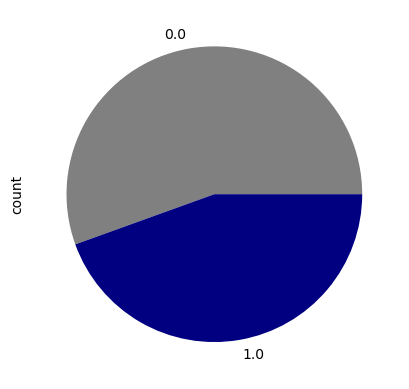

In [25]:
df['PRCP'].value_counts().plot(kind='pie', colors=['grey', 'navy'])

Based on the class value counts plot we can assume that our dataset is pretty balanced.

#### Features correlation

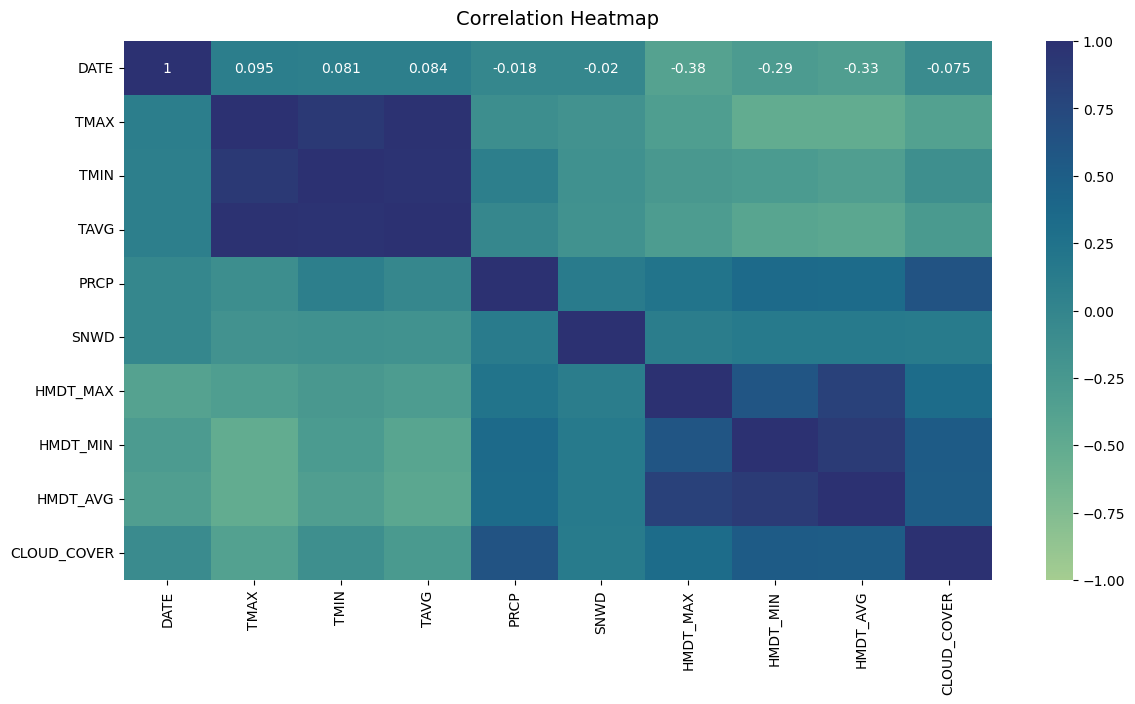

In [28]:
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("crest", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Feature Selection based on chi-square test

In [30]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['PRCP', 'DATE'],axis='columns')
y = df.PRCP

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_scores = chi2(X_scaled, y)
chi_scores

(array([5.67383945e+00, 2.16330671e+00, 3.11450665e-01, 2.77527838e+01,
        7.83815332e+00, 4.18301591e+01, 2.43440261e+01, 4.55311481e+02]),
 array([1.72197274e-002, 1.41340240e-001, 5.76791361e-001, 1.37849701e-007,
        5.11548385e-003, 9.95558934e-011, 8.05762359e-007, 5.03738688e-101]))

<Axes: >

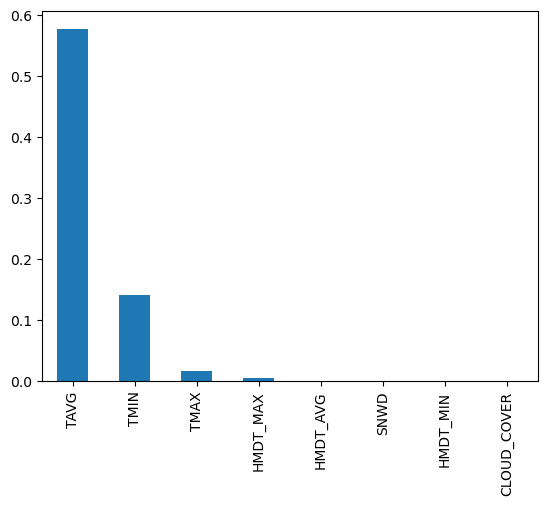

In [31]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Since TAVG has high p-value, it is independent of the reponse and can not be considered for model training.

In [33]:
X = X.drop(['TAVG'],axis = 1)
X.head()

,TMAX,TMIN,SNWD,HMDT_MAX,HMDT_MIN,HMDT_AVG,CLOUD_COVER
0,2.610529,-4.039472,0.0,96.0,59.0,73.875000,32.166668
1,5.630528,-1.179471,0.0,96.0,66.0,78.250000,70.595830
2,9.200529,-1.619471,0.0,97.0,65.0,81.541664,55.558334
3,10.950529,2.600528,0.0,89.0,57.0,69.791664,93.629170
4,8.540529,5.860529,0.0,98.0,76.0,89.458336,90.500000


## Modeling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn import metrics as mcs
import pickle

### Logistic Regression 

Splitting our data into testing and training sets:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

Declaring and fitting our model to data:

In [40]:
log_clf = LogisticRegression(max_iter=500).fit(X_train, y_train)

y_pred = log_clf.predict(X_test)

#### Results and evaluation

Confusion matrix:

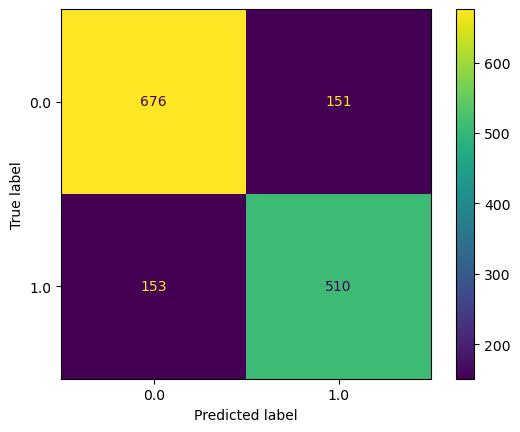

In [43]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
log_disp.plot(values_format='')
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       827
         1.0       0.77      0.77      0.77       663

    accuracy                           0.80      1490
   macro avg       0.79      0.79      0.79      1490
weighted avg       0.80      0.80      0.80      1490



### Decision Tree Model

Declaring decision tree model and setting cross-validation:

In [47]:
tree_ = DecisionTreeClassifier()
cv_params = {'max_depth':[2, 4, 6, 8, 10, 12, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree = GridSearchCV(tree_, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting our model to data:

In [49]:
%%time
tree.fit(X_train, y_train)

CPU times: total: 9.06 s
Wall time: 9.33 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

Model's best parameters:

#### Results and evaluation

In [52]:
tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [53]:
def make_results(model_name:str, model_object, metric:str):
    
    """
        Creates a dataframe with model's evaluatin metrics.    
    """
    
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    return table

Model's results:

In [55]:
tree_res = make_results('decision tree', tree, 'auc')
tree_res

,model,precision,recall,F1,accuracy,auc
0,decision tree,0.758857,0.753521,0.754593,0.782728,0.869352


Let's make model's feature importances plot:

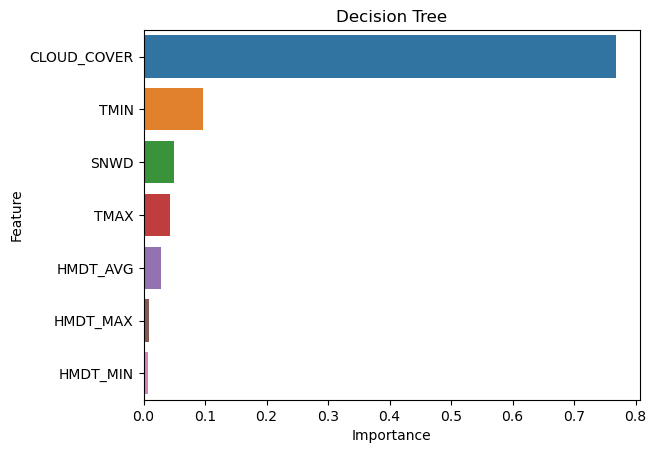

In [57]:
tree_importances = pd.DataFrame(tree.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)
tree_importances = tree_importances[tree_importances['gini_importance'] != 0]
sns.barplot(data=tree_importances, x="gini_importance", y=tree_importances.index, orient='h')
plt.title("Decision Tree", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Among the features considered, CLOUD_COVER emerges as the one that affects the model's performance the most.

### Random Forest Model

Declaring random forest model and setting cross-validation:

In [61]:
rf_ = RandomForestClassifier()
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf = GridSearchCV(rf_, cv_params, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)

Fitting our model to data:

In [63]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 15.3 s
Wall time: 16min 23s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

Model's best parameters:

In [65]:
rf.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [66]:
rf_res = make_results('random forest', rf, 'auc')

In [67]:
print(rf_res)

           model  precision    recall        F1  accuracy       auc
0  random forest   0.786756  0.792254  0.789381   0.81204  0.896657


Random forest model showed the result slightly better than decision tree model and logistic regression model based on accuracy metric.

#### Model export

Lets export our random forest model to a project folder.

In [71]:
import os
print(os.getcwd())

C:\Users\Admin\PROJECTS\PRECIPITATION


Defining a path to folder:

In [73]:
path = 'C:/Users/Admin/PROJECTS/PRECIPITATION/'

We need to functions - to save our model into a folder, and to read it.

In [75]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [76]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Lets save it

In [78]:
write_pickle(path, rf, 'random_forest')